In [52]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [4]:
#import data files
nyc_cleanedcrimedata_path = "clean_data/cleaned_nyc_crime_data.csv"

In [53]:
#Read nyc crime data 
nyc_cleanedcrimedata_df = pd.read_csv(nyc_cleanedcrimedata_path)
nyc_cleanedcrimedata_df.head()

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,pop
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
1,MISDEMEANOR,BROOKLYN,Unknown,Unknown,Unknown,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,Unknown,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",Unknown,UNKNOWN,Unknown,2590516


In [54]:
nyc_cleanedcrimedata_df=nyc_cleanedcrimedata_df.rename(columns={"pop":"population"})
nyc_cleanedcrimedata_df.head()

,offence level,borough,suspect age group,suspect race,suspect sex,Latitude,Longitude,Lat_Lon,victim age group,victim race,victim sex,population
0,VIOLATION,BROOKLYN,45-64,WHITE,M,40.621708,-74.000593,"(40.621708, -74.000593)",25-44,WHITE,F,2590516
1,MISDEMEANOR,BROOKLYN,Unknown,Unknown,Unknown,40.618867,-74.021057,"(40.618867, -74.021057)",25-44,WHITE,M,2590516
2,VIOLATION,BROOKLYN,25-44,BLACK,M,40.705035,-73.939373,"(40.705035, -73.939373)",45-64,BLACK,F,2590516
3,MISDEMEANOR,BROOKLYN,25-44,BLACK,Unknown,40.700294,-73.990838,"(40.700294, -73.990838)",25-44,BLACK,F,2590516
4,MISDEMEANOR,BROOKLYN,45-64,WHITE,M,40.622093,-73.998140,"(40.622093, -73.99814)",Unknown,UNKNOWN,Unknown,2590516


Q2 What age group is most likely to commit a crime and be victim to a crime
for each level of offense?  (perpetrator victim age for each level of offence)
    -	Perpetrator barchart
    -	Victim barchart
  

In [55]:
#groupby  commited crime by Perpetractor's age and level of offence
grouped_Perpetrator=nyc_cleanedcrimedata_df.groupby(["suspect age group","offence level"]).size().reset_index(name='count')
grouped_Perpetrator.head(20)

,suspect age group,offence level,count
0,18-24,FELONY,12684
1,18-24,MISDEMEANOR,16157
2,18-24,VIOLATION,5498
3,25-44,FELONY,40851
4,25-44,MISDEMEANOR,66982
5,25-44,VIOLATION,25499
6,45-64,FELONY,11857
7,45-64,MISDEMEANOR,22385
8,45-64,VIOLATION,11630
9,65+,FELONY,899


In [56]:
#Pivot the dataframe for better visualisation
Perpetratorpivot_df = grouped_Perpetrator.pivot(index='suspect age group', columns='offence level', values='count')
pivot_df.head(6)

offence level,FELONY,MISDEMEANOR,VIOLATION
suspect age group,,,
18-24,12684,16157,5498
25-44,40851,66982,25499
45-64,11857,22385,11630
65+,899,2000,2099
<18,2688,4402,2384
Unknown,103917,151782,35964


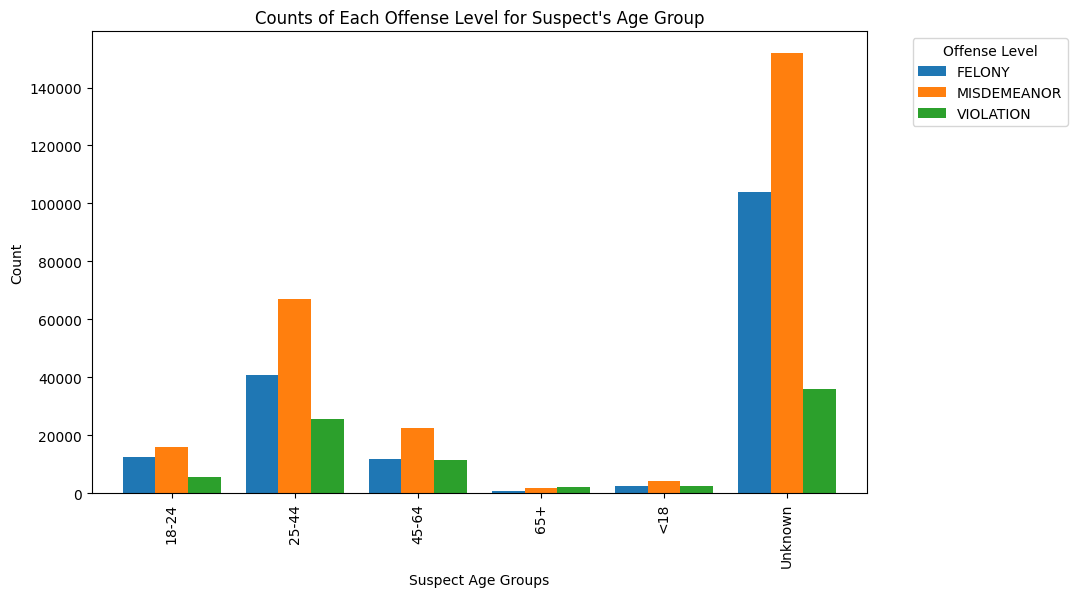

In [57]:
# Plotting the grouped bar chart
Perpetratorpivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Counts of Each Offense Level for Suspect's Age Group")
plt.xlabel("Suspect Age Groups")
plt.ylabel("Count")
plt.legend(title="Offense Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analysis:
Most common offence level for across all suspect age group is Misdemeanor follwed by Felony and Violation.
The age group 25-44 has the highest counts across all offense levels, indicating that this age group is most frequently associated with reported incidents.
The Unknown category for suspect age groups seems to have significantly higher counts for all offense levels, suggesting that the age information is missing or unspecified in many cases.
The <18 age group has relatively lower counts compared to the 25-44 age group but still shows a notable presence.

Each offense level has a different distribution across age groups, highlighting the variations in the involvement of different age groups in various types of offenses. Further analysis could explore the reasons behind the patterns observed, such as potential trends or correlations between age groups and types of offenses.

In [58]:
#groupby  commited crime by Victim's age and level of offence
grouped_Victim=nyc_cleanedcrimedata_df.groupby(["victim age group","offence level"]).size().reset_index(name='count')
grouped_Victim.head(20)

,victim age group,offence level,count
0,18-24,FELONY,15327
1,18-24,MISDEMEANOR,20566
2,18-24,VIOLATION,7909
3,25-44,FELONY,62405
4,25-44,MISDEMEANOR,84301
5,25-44,VIOLATION,38365
6,45-64,FELONY,31604
7,45-64,MISDEMEANOR,43549
8,45-64,VIOLATION,23491
9,65+,FELONY,10715


In [59]:
#Pivot the dataframe for better visualisation
Victimpivot_df = grouped_Victim.pivot(index='victim age group', columns='offence level', values='count')
Victimpivot_df.head(6)

offence level,FELONY,MISDEMEANOR,VIOLATION
victim age group,,,
18-24,15327,20566,7909
25-44,62405,84301,38365
45-64,31604,43549,23491
65+,10715,9212,5813
<18,4737,9626,3726
Unknown,48108,96454,3770


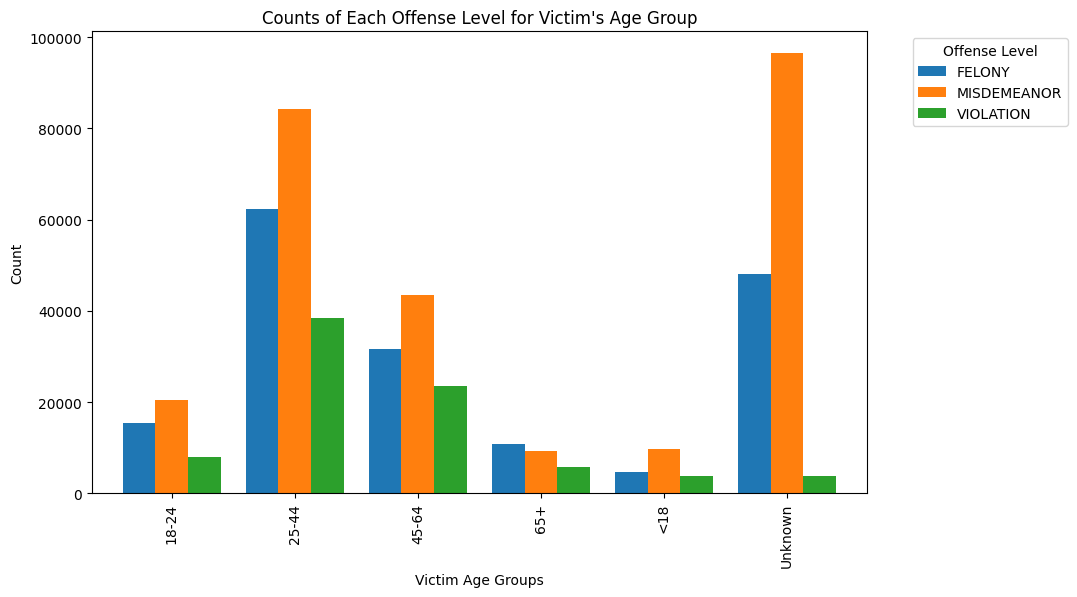

In [60]:
# Plotting the victims grouped bar chart
Victimpivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Counts of Each Offense Level for Victim's Age Group")
plt.xlabel("Victim Age Groups")
plt.ylabel("Count")
plt.legend(title="Offense Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analysis:
Similar to the suspect age group analysis, the 25-44 age group has the highest counts across all offense levels, indicating that this age group is most at risk.
The Unknown category for victim age groups seems to have relatively high counts, suggesting that age information for victims is missing or unspecified in many cases.
The <18 age group shows notable counts, particularly for MISDEMEANOR offenses.

Q3 What is the per capita ratio of crimes commited in each borough?	
    -   Summary table
    -   Barchart
    -   Irena 

In [62]:
#group total crimes per borough
boroughcrime_count=nyc_cleanedcrimedata_df.groupby(['borough','population']).size().reset_index(name='totalcrimes')
boroughcrime_count.head()


,borough,population,totalcrimes
0,BRONX,1379946,110031
1,BROOKLYN,2590516,144366
2,MANHATTAN,1596273,130972
3,QUEENS,2278029,112248
4,STATEN ISLAND,491133,22061


In [63]:
#calculate per capita ration for crime commited in each borough
boroughcrime_count['percapita_ratio']=boroughcrime_count['totalcrimes']/boroughcrime_count['population']*100

boroughcrime_count.head()

,borough,population,totalcrimes,percapita_ratio
0,BRONX,1379946,110031,7.973573
1,BROOKLYN,2590516,144366,5.572867
2,MANHATTAN,1596273,130972,8.204862
3,QUEENS,2278029,112248,4.927418
4,STATEN ISLAND,491133,22061,4.491859


Manhattan has the highest per capita ratio, indicating a relatively higher rate of crimes per person compared to other boroughs (8.20%).
Staten Island has the lowest per capita ratio, suggesting a relatively lower rate of crimes per person (4.49%).